Importing Libraries

In [6]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import nltk
import os
import matplotlib.pyplot as plt 
import seaborn as sns

Reading data

In [7]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/shoppingappreviews-dataset/ShoppingAppReviews Dataset/ShoppingAppReviews/csv/Alibaba.csv
/kaggle/input/shoppingappreviews-dataset/ShoppingAppReviews Dataset/ShoppingAppReviews/csv/Aliexpress.csv
/kaggle/input/shoppingappreviews-dataset/ShoppingAppReviews Dataset/ShoppingAppReviews/csv/Myntra.csv
/kaggle/input/shoppingappreviews-dataset/ShoppingAppReviews Dataset/ShoppingAppReviews/csv/Flipkart.csv
/kaggle/input/shoppingappreviews-dataset/ShoppingAppReviews Dataset/ShoppingAppReviews/csv/Meesho.csv
/kaggle/input/shoppingappreviews-dataset/ShoppingAppReviews Dataset/ShoppingAppReviews/csv/Lazada.csv
/kaggle/input/shoppingappreviews-dataset/ShoppingAppReviews Dataset/ShoppingAppReviews/csv/Amazon shopping.csv
/kaggle/input/shoppingappreviews-dataset/ShoppingAppReviews Dataset/ShoppingAppReviews/csv/Snapdeal.csv
/kaggle/input/shoppingappreviews-dataset/ShoppingAppReviews Dataset/ShoppingAppReviews/csv/Shein.csv
/kaggle/input/shoppingappreviews-dataset/ShoppingAppReviews Datas

In [8]:
data = pd.read_csv(r"/kaggle/input/shoppingappreviews-dataset/ShoppingAppReviews Dataset/ShoppingAppReviews/csv/Amazon shopping.csv")
data.head()

,reviewId,content,score,thumbsUpCount,at,replyContent,repliedAt,appName
0,3e4bd1fc-bbc0-4862-9a53-4674535263b3,I have been an Amazon customer for YEARS. I ne...,2,29,1723341060000,NaN,NaN,Amazon shopping
1,92144bc8-41a3-4625-a6a5-83b81b9277ab,For the last 30 days or more I can only naviga...,2,38,1723192685000,NaN,NaN,Amazon shopping
2,05e6e39e-c098-4747-9fe7-2092892676cd,Although I absolutely LOVE the company and the...,2,12,1723345924000,NaN,NaN,Amazon shopping
3,0478ac98-b4b1-4934-a6f3-edd0ecf2cf00,"Experience had gotten better but lately, they ...",2,8,1723204284000,NaN,NaN,Amazon shopping
4,9b7aedaf-8676-467c-b0bf-21e4fb494c54,Too many sponsored irrelevant items. About 40-...,2,6,1723191781000,NaN,NaN,Amazon shopping


EDA

In [9]:
data["content"].values[0]  #to view a full review

"I have been an Amazon customer for YEARS. I never had a problem with the Amazon app. Sure, it was glitchy sometimes, but I could get past it. Now, I can't even load my lists from before, and nothing saves to my favorites. When I click to go back to my cart, it just goes back to the last page I was on. It is so frustrating because I had everything organized and ready to save to favorites so I could move things to organized lists. Now, I can't do that because of this stupid update. Fix it."

In [77]:
data.isna().sum()

reviewId             0
content              0
score                0
thumbsUpCount        0
at                   0
replyContent     98998
repliedAt        98998
appName              0
Sentiment        99000
dtype: int64

In [81]:
data.drop(columns=["replyContent" , "repliedAt"] , inplace = True)

In [82]:
data.head()

,reviewId,content,score,thumbsUpCount,at,appName,Sentiment
0,3e4bd1fc-bbc0-4862-9a53-4674535263b3,I have been an Amazon customer for YEARS. I ne...,2,29,1723341060000,Amazon shopping,NaN
1,92144bc8-41a3-4625-a6a5-83b81b9277ab,For the last 30 days or more I can only naviga...,2,38,1723192685000,Amazon shopping,NaN
2,05e6e39e-c098-4747-9fe7-2092892676cd,Although I absolutely LOVE the company and the...,2,12,1723345924000,Amazon shopping,NaN
3,0478ac98-b4b1-4934-a6f3-edd0ecf2cf00,"Experience had gotten better but lately, they ...",2,8,1723204284000,Amazon shopping,NaN
4,9b7aedaf-8676-467c-b0bf-21e4fb494c54,Too many sponsored irrelevant items. About 40-...,2,6,1723191781000,Amazon shopping,NaN


In [83]:
print(data.shape)          #data is 99000 rows and 8 columns

(99000, 7)


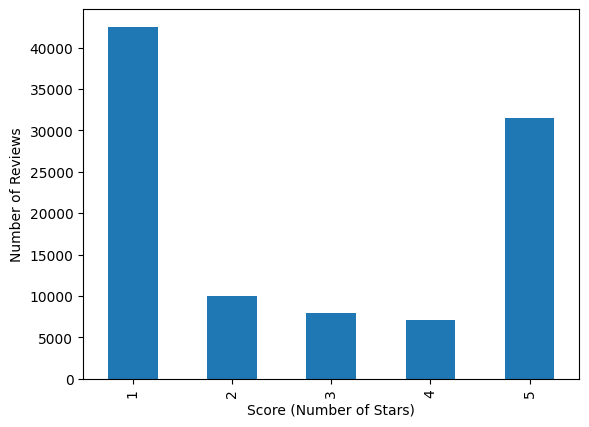

In [84]:
data["score"].value_counts().sort_index().plot(kind = "bar" , ylabel = "Number of Reviews" , xlabel = "Score (Number of Stars)")   
plt.show()

Using NLTK preprocessing

In [85]:
wtokens = nltk.word_tokenize(review)  #using word tokenizer to split the review into words
wtokens[:10]     #only displays the first 10

['What', 'can', 'I', 'say', ',', 'Amazon', 'is', 'amazing', '.', 'The']

In [86]:
tags = nltk.pos_tag(wtokens)  #to find the "part of speech tagging" for each word token
tags[:5]

[('What', 'WP'), ('can', 'MD'), ('I', 'PRP'), ('say', 'VB'), (',', ',')]

In [87]:
entities = nltk.chunk.ne_chunk(tags)
entities.pprint()   #pprint() prints a readable version of the tree generated by the previous line of code

(S
  What/WP
  can/MD
  I/PRP
  say/VB
  ,/,
  (PERSON Amazon/NNP)
  is/VBZ
  amazing/VBG
  ./.
  The/DT
  selection/NN
  is/VBZ
  mind/JJ
  boggling/VBG
  ./.
  I/PRP
  can/MD
  find/VB
  just/RB
  about/IN
  anything/NN
  ./.
  Service/NNP
  is/VBZ
  wonderful/JJ
  ./.
  They/PRP
  have/VBP
  their/PRP$
  business/NN
  dialed/VBN
  in/IN
  darn/NN
  near/IN
  perfectly/RB
  ./.
  It/PRP
  's/VBZ
  a/DT
  service/NN
  that/WDT
  is/VBZ
  relatively/RB
  perfect/JJ
  even/RB
  to/TO
  someone/NN
  who/WP
  struggles/VBZ
  with/IN
  technology/NN
  ./.
  I/PRP
  have/VBP
  made/VBN
  purchases/NNS
  from/IN
  around/IN
  the/DT
  world/NN
  ./.
  items/NNS
  I/PRP
  never/RB
  would/MD
  have/VB
  imagined/VBN
  imagined/JJ
  that/IN
  I/PRP
  could/MD
  find/VB
  or/CC
  even/RB
  know/VB
  existed/VBN
  ./.)


["Chunking makes use of POS tags to group words and apply chunk tags to those groups. Chunks don’t overlap, so one instance of a word can be in only one chunk at a time."](https://realpython.com/nltk-nlp-python/#chunking)


Sentiment Scoring using VADER

"neg" --> Negative

"neu" --> Neutral

"pos" --> Positive

In [88]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm     #tqdm is a progress bar tracker

In [89]:
sia = SentimentIntensityAnalyzer()

In [91]:
review = data["content"][20]    #picking a random review
print(review)

What can I say, Amazon is amazing. The selection is mind boggling. I can find just about anything. Service is wonderful. They have their business dialed in darn near perfectly. It's a service that is relatively perfect even to someone who struggles with technology. I have made purchases from around the world. items I never would have imagined imagined that I could find or even know existed.


In [92]:
sia.polarity_scores(review)      #the review is more on the positive side (the overall compound score is positive)

{'neg': 0.034, 'neu': 0.737, 'pos': 0.229, 'compound': 0.9393}

In [93]:
review2 = data["content"][30]    #testing another random review
print(review2)

App is so slow now. It takes forever to switch between sizes and colors of items. Also won't load "my orders" tab on app to check order status or return an item, or check on a return. I need to download the QR codes to do free Kohl's drop off but it won't show me the orders! It has been doing this for months! It either says "something went wrong" or just doesn't load at all. Also no one asked for an annoying AI bot.


In [94]:
sia.polarity_scores(review2)    #the review is more negative this time (the overall compound score is negative)

{'neg': 0.136, 'neu': 0.841, 'pos': 0.023, 'compound': -0.8881}

Running "polarity score" on the entire dataset

In [95]:
results = {}

for i , row in tqdm(data.iterrows(), total = len(data)):
    text = row["content"]
    rev_id = row["reviewId"]
    results[rev_id] = sia.polarity_scores(text)

  0%|          | 0/99000 [00:00<?, ?it/s]

In [96]:
vaders = pd.DataFrame(results).T  #converting the results into a pandas dataframe
vaders.head()

,neg,neu,pos,compound
3e4bd1fc-bbc0-4862-9a53-4674535263b3,0.097,0.712,0.191,0.7444
92144bc8-41a3-4625-a6a5-83b81b9277ab,0.000,1.000,0.000,0.0000
05e6e39e-c098-4747-9fe7-2092892676cd,0.054,0.802,0.144,0.8098
0478ac98-b4b1-4934-a6f3-edd0ecf2cf00,0.000,0.972,0.028,0.2382
9b7aedaf-8676-467c-b0bf-21e4fb494c54,0.105,0.824,0.071,-0.5455


In [97]:
data2 = data  #creating a copy of the original data set

In [99]:
data2["Sentiment"] = vaders["compound"].values
data2.head()

,reviewId,content,score,thumbsUpCount,at,appName,Sentiment
0,3e4bd1fc-bbc0-4862-9a53-4674535263b3,I have been an Amazon customer for YEARS. I ne...,2,29,1723341060000,Amazon shopping,0.7444
1,92144bc8-41a3-4625-a6a5-83b81b9277ab,For the last 30 days or more I can only naviga...,2,38,1723192685000,Amazon shopping,0.0000
2,05e6e39e-c098-4747-9fe7-2092892676cd,Although I absolutely LOVE the company and the...,2,12,1723345924000,Amazon shopping,0.8098
3,0478ac98-b4b1-4934-a6f3-edd0ecf2cf00,"Experience had gotten better but lately, they ...",2,8,1723204284000,Amazon shopping,0.2382
4,9b7aedaf-8676-467c-b0bf-21e4fb494c54,Too many sponsored irrelevant items. About 40-...,2,6,1723191781000,Amazon shopping,-0.5455


Visualizing the results

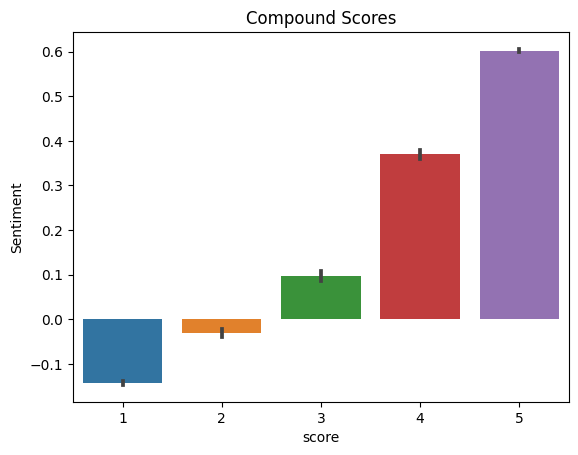

In [104]:
fig = sns.barplot(data = data2 , x = "score" , y = "Sentiment")
fig.set_title("Compound Scores")
plt.show()